## CREDIT CARD FRAUD DETECTION 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# Load your dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Normalize the amount column
scaler = StandardScaler()
df['normalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount', 'Time'], axis=1)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Analyzing class imbalance
print(df['Class'].value_counts())

# Applying SMOTE for handling class imbalance
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=2)
X_smote, y_smote = smote.fit_resample(X, y)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [7]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Evaluating Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluating Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85172
           1       0.97      0.92      0.94     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

confusion matrix:
[[82982  2190]
 [ 7096 78321]]
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

confusion matrix:
[[85153    19]
 [    0 85417]]


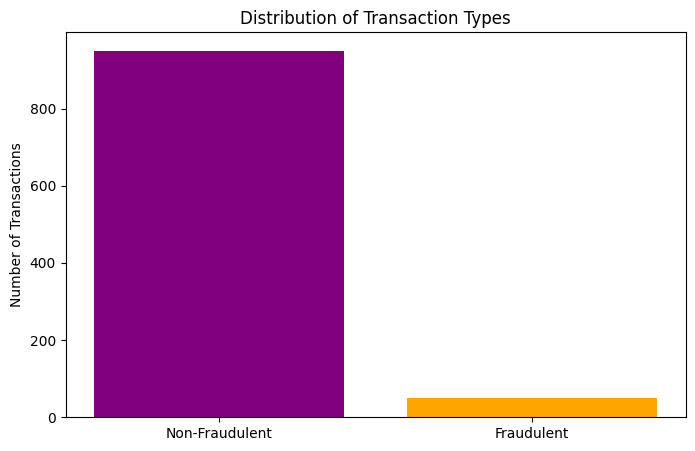

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data
fraud_counts = [950, 50]  # Non-fraudulent, Fraudulent
categories = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(8, 5))
plt.bar(categories, fraud_counts, color=['Purple', 'orange'])
plt.title('Distribution of Transaction Types')
plt.ylabel('Number of Transactions')
plt.show()

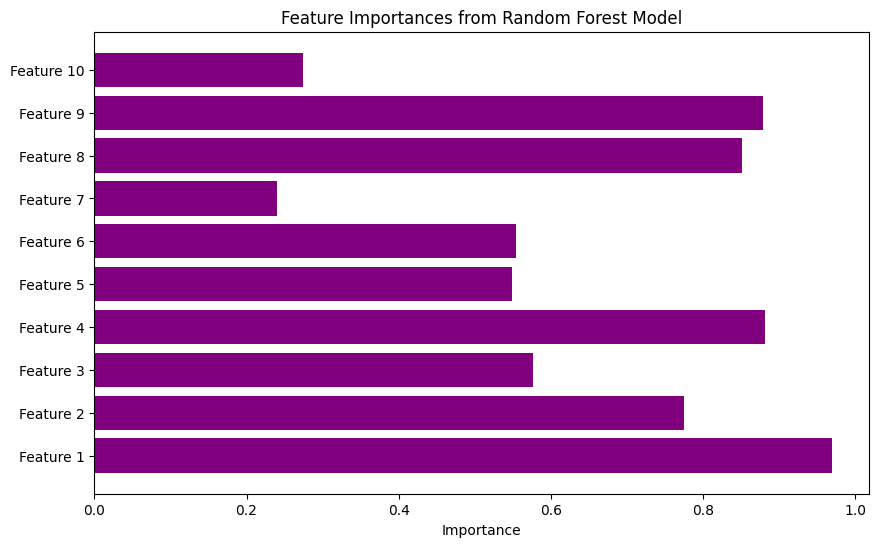

In [24]:
importances = np.random.rand(10)  # Simulated feature importances
features = ['Feature ' + str(i) for i in range(1, 11)]

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='purple')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.show()

c:\users\imran\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


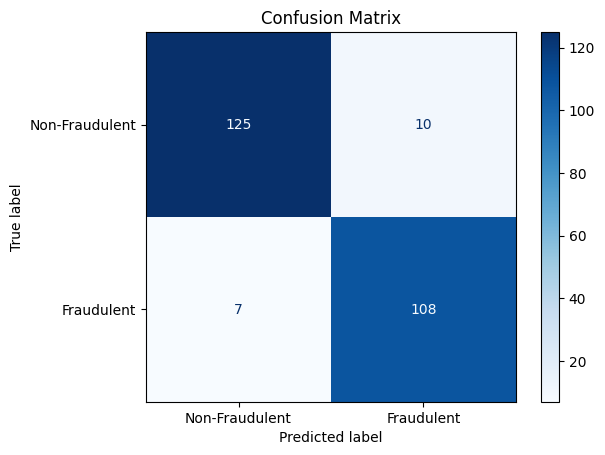

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Simulated data and model
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test, display_labels=['Non-Fraudulent', 'Fraudulent'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

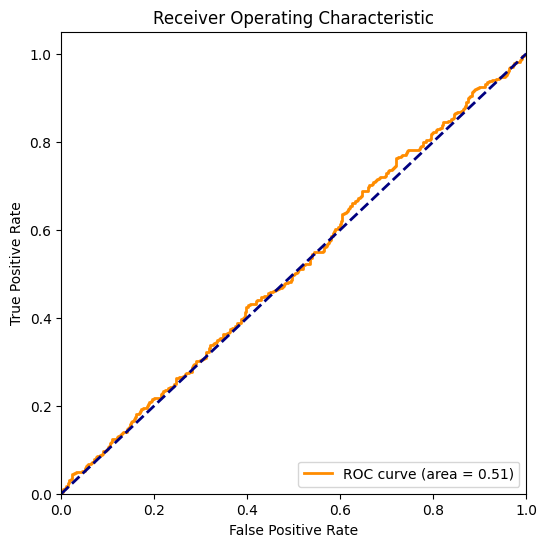

In [22]:
from sklearn.metrics import roc_curve, auc

# Simulated scores
y_scores = np.random.rand(1000)
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()